# importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# importing data

In [2]:
df = pd.read_csv("aau1043_dnm.tsv")
df_age = pd.read_csv("aau1043_parental_age.tsv")
df_age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


## making a summation dataset and merging with parental age dataset

In [3]:
tot_4 = pd.DataFrame(df['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='tot_dnm'))
mat_4 = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='mother'].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm'))
pat_4 = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='father'].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm'))
new_df = pd.DataFrame.merge(tot_4, mat_4, on ='Proband_id')
new_df_2 = pd.DataFrame.merge(new_df, pat_4, on ='Proband_id')
new_df_3 = pd.DataFrame.merge(new_df_2, df_age, on ='Proband_id')
new_df_3


,Proband_id,tot_dnm,mat_dnm,pat_dnm,Father_age,Mother_age
0,91410,122,10,111,51,34
1,114094,121,22,98,51,44
2,111288,115,21,93,53,44
3,8147,114,27,78,40,33
4,88246,113,25,87,56,46
...,...,...,...,...,...,...
391,121087,37,1,36,18,17
392,62630,34,5,28,23,20
393,76504,34,5,27,19,17
394,37789,34,3,17,19,19


# plotting parental age vs parental de novo mutations

Text(0.5, 1.0, 'maternal age vs maternal dnm')

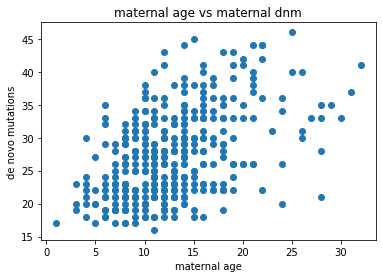

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=new_df_3['mat_dnm'], y=new_df_3['Mother_age'])
plt.ylabel('de novo mutations')
plt.xlabel('maternal age')
plt.title('maternal age vs maternal dnm')

Text(0.5, 1.0, 'paternal age vs paternal dnm')

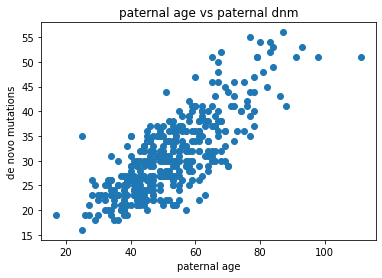

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=new_df_3['pat_dnm'], y=new_df_3['Father_age'])
plt.ylabel('de novo mutations')
plt.xlabel('paternal age')
plt.title('paternal age vs paternal dnm')

# Least Squares regression: Is Maternal Age a Good Predictor of Maternal DNM?

In [6]:
model = smf.ols(formula="mat_dnm ~ Mother_age", data =new_df_3)
results= model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        18:17:23   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## answer:
yes-this relationship between maternal age and dnm is significant (p<0.001).
the scale (beta1 param) is 0.337, so for each add'l 3 years in age there is another dnm. 

# Least Squares regression: Is Paternal Age a Good Predictor of Paternal DNM?

In [7]:
model = smf.ols(formula="pat_dnm ~ Father_age", data =new_df_3)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        18:17:23   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## answer:
yes-this relationship between paternal age and dnm is significant (p<0.001).
the scale (beta1 param) is 1.3538, so for each add'l 1 years in age there is 1.3538 another dnm.

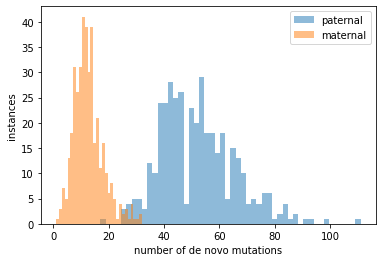

In [8]:
fig, ax = plt.subplots()
ax.hist(new_df_3["pat_dnm"], label = "paternal", bins = 50, alpha = 0.5)
ax.hist(new_df_3["mat_dnm"], label = "maternal", bins = 30, alpha = 0.5)
plt.legend()
plt.ylabel('instances')
plt.xlabel('number of de novo mutations')
plt.show()

# testing for difference in mean between maternal and paternal dnm

In [9]:
stats.ttest_ind(new_df_3["pat_dnm"], new_df_3["mat_dnm"])


Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

# poisson dist. linear regression
### maternal, then paternal

In [10]:
model = smf.poisson(formula="mat_dnm ~ Mother_age", data =new_df_3)
results= model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        18:17:24   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [11]:
model = smf.poisson(formula="pat_dnm ~ Father_age", data =new_df_3)
results= model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        18:17:24   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [12]:
new_df_3.mean()


Proband_id    79887.515152
tot_dnm          66.744949
mat_dnm          12.780303
pat_dnm          52.015152
Father_age       30.792929
Mother_age       27.217172
dtype: float64

"We can interpret the Poisson regression coefficient as follows: for a one unit change in the predictor variable, the difference in the logs of expected counts is expected to change by the respective regression coefficient, given the other predictor variables in the model are held constant."

We would expect a yhat*(e^0.0241-1) or 0.02439275204*y_hat per year,
So with a mean pat pnm of 52, and a mean paternal age of 30:(0.02439275204 * 52.015152) * (19.707071)
So for a 50.5 year old male, we would expect 25 additional paternal dnm for a total of 77.02. 